<a href="https://www.kaggle.com/code/caueausec/florianopolis-rent-pricing-dataset-eda?scriptVersionId=153613325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pre Analysis Setup

## Modules & Environment Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/florianpolis-rent-pricing-dataset
/kaggle/input/florianpolis-rent-pricing-dataset/code
/kaggle/input/florianpolis-rent-pricing-dataset/code/pynb
/kaggle/input/florianpolis-rent-pricing-dataset/code/src
/kaggle/input/florianpolis-rent-pricing-dataset/tests
/kaggle/input/florianpolis-rent-pricing-dataset/pocs
/kaggle/input/florianpolis-rent-pricing-dataset/pocs/poc_scrapy
/kaggle/input/florianpolis-rent-pricing-dataset/pocs/poc_scrapy/raw
/kaggle/input/florianpolis-rent-pricing-dataset/pocs/poc_selenium
/kaggle/input/florianpolis-rent-pricing-dataset/pocs/poc_selenium/extractions
/kaggle/input/florianpolis-rent-pricing-dataset/pocs/poc_selenium/data
/kaggle/input/florianpolis-rent-pricing-dataset/maps
/kaggle/input/florianpolis-rent-pricing-dataset/maps/regioes_administrativas
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_bairros
/kaggle/input/florianpolis-rent-pricin

## Custom Functions

### Criando uma função personalizada de análise de medidas descritivas quantitativas

In [2]:
def table_describe(data_att):
    # Medidas de Tendência Central
    ct1 = pd.DataFrame(data_att.apply(np.mean)).T
    ct2 = pd.DataFrame(data_att.apply(np.median)).T


    # Medidas de Dipersão
    d1 = pd.DataFrame(data_att.apply(np.std)).T
    d2 = pd.DataFrame(data_att.apply(min)).T
    d3 = pd.DataFrame(data_att.apply(max)).T
    d4 = pd.DataFrame(data_att.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(data_att.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(data_att.apply(lambda x: x.kurtosis())).T

    # concat
    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'amplitude', 'mean', 'median', 'std', 'skew', 'kurtosis']
    round(m,2)
    return m

# Data Loading

### Data Type Definition using pandas Dtypes

In [3]:
dtypes =   {'data': 'datetime64[s]',
            'fonte': 'str',
            'id': 'int64',
            'descricao': 'str',
            'endereco': 'str',
            'rua': 'str',
            'numero': 'float64',
            'bairro': 'str',
            'cidade': 'str',
            'valor': 'int',
            'periodicidade': 'str',
            'condominio': 'float',
            'area': 'float64',
            'qtd_banheiros': 'float64',
            'qtd_quartos': 'float64',
            'qtd_vagas': 'float64',
            'url': 'str',
            'amenities': 'str'}

### Importing The Data from the demo csv file

*Note: Due to the lack of compression of csv files the full dataset is encoded in apache.parquet file format. the demo .csv file stores only the last extraction results, while the .parquet file stores the whole history.*

In [4]:
# Importando o arquivo do dataset e carregando a tipagem
df = pd.read_csv('/kaggle/input/florianpolis-rent-pricing-dataset/data/dataset_demo.csv')
df = df.astype(dtypes)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('display.precision', 2) # Definindo a precisão em dígitos com a qual os números float64 serão exibidos.
df.head(5)

,data,fonte,id,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,amenities
0,2023-11-07 15:33:39,Vivareal,2660294130,"Apartamento com 3 Quartos para Aluguel, 88m²","Rua Desembargador Gil Costa, 310 - Capoeiras, ...",Rua Desembargador Gil Costa,310.0,Capoeiras,florianopolis,1900,Mês,529.0,88.0,2.0,3.0,1.0,https://vivareal.com.br/imovel/apartamento-3-q...,Área de serviço
1,2023-11-07 15:33:39,Vivareal,2665127408,"Sala/Conjunto para Aluguel, 42m²","Rua Vidal Ramos, 53 - Centro, Florianópolis - SC",Rua Vidal Ramos,53.0,Centro,florianopolis,1100,Mês,NaN,42.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...,nan
2,2023-11-07 15:33:39,Vivareal,2666598223,"Ponto comercial/Loja/Box para Aluguel, 30m²","Centro, Florianópolis - SC",nan,NaN,Centro,florianopolis,2200,Mês,NaN,30.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/ponto-comercial...,nan
3,2023-11-07 15:33:39,Vivareal,2644853558,"Apartamento com 2 Quartos para Aluguel, 72m²","Avenida Buriti, 620 - Itacorubi, Florianópolis...",Avenida Buriti,620.0,Itacorubi,florianopolis,3800,Mês,533.0,72.0,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,Churrasqueira; Elevador; Varanda; Academia; Es...
4,2023-11-07 15:33:39,Vivareal,2627617160,"Sala/Conjunto para Aluguel, 90m²","Rua Lauro Linhares, 728 - Trindade, Florianópo...",Rua Lauro Linhares,728.0,Trindade,florianopolis,2600,Mês,NaN,90.0,1.0,NaN,2.0,https://vivareal.com.br/imovel/sala-comercial-...,nan


> Podemos ver que existem tanto anúncios de salas comerciais quanto casas e apartamentos, por isso precisamos aplicar um filtro.

> Podemos ver também que há anúncios mensais e diários, e em ambos os casos o valor de condomínio precisa ser acrescido do valor total, faremos da seguinte forma:

## Obtendo uma amostra aleatória dos registros:

Caso prefira, pode selecionar apenas uma parte dos registros utilizando o método sample, exemplificado abaixo:

In [5]:
df.sample(n=15,random_state=443) # Amostra aleatória de 10 registros, reproduzível com a seed 443 no parâmetro 'random_state'.

,data,fonte,id,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,amenities
3992,2023-11-07 15:35:54,Vivareal,2649391363,"Ponto comercial/Loja/Box para Aluguel, 35m²","Rua Tiradentes, 136 - Centro, Florianópolis - SC",Rua Tiradentes,136.0,Centro,florianopolis,3000,Mês,NaN,35.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/ponto-comercial...,nan
4569,2023-11-07 15:36:11,Vivareal,2664749206,"Sala/Conjunto para Aluguel, 40m²","Centro, Florianópolis - SC",nan,NaN,Centro,florianopolis,1100,Mês,NaN,40.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...,Copa
7111,2023-11-07 15:37:16,Vivareal,2644841863,"Apartamento com 3 Quartos para Aluguel, 94m²","Rua Sebastião Laurentino da Silva, 152 - Córre...",Rua Sebastião Laurentino da Silva,152.0,Córrego Grande,florianopolis,3800,Mês,1009.0,94.0,3.0,3.0,2.0,https://vivareal.com.br/imovel/apartamento-3-q...,Churrasqueira; Elevador; Academia; Área de ser...
1637,2023-11-07 15:34:21,Vivareal,2514639349,"Apartamento com 2 Quartos para Aluguel, 90m²","Avenida das Raias, 230 - Jurerê Internacional,...",Avenida das Raias,230.0,Jurerê Internacional,florianopolis,500,Dia,NaN,90.0,3.0,2.0,2.0,https://vivareal.com.br/imovel/apartamento-2-q...,Piscina; Mobiliado; Elevador; Condomínio fecha...
1939,2023-11-07 15:34:30,Vivareal,2644372004,"Apartamento com Quarto para Aluguel, 43m²","Rua do Marfim, 203 - Monte Verde, Florianópoli...",Rua do Marfim,203.0,Monte Verde,florianopolis,1800,Mês,NaN,43.0,1.0,1.0,NaN,https://vivareal.com.br/imovel/apartamento-1-q...,Mobiliado; Área de serviço
2161,2023-11-07 15:34:37,Vivareal,2445229979,"Apartamento com Quarto para Aluguel, 43m²","Rua Antônio Heil - Canasvieiras, Florianópolis...",Rua Antônio Heil,NaN,Canasvieiras,florianopolis,500,Dia,NaN,43.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,nan
5827,2023-11-07 15:36:43,Vivareal,2563800538,Apartamento com Quarto para Venda/Aluguel 63m²,"Avenida dos Búzios, 1760 - Jurerê Internaciona...",Avenida dos Búzios,1760.0,Jurerê Internacional,florianopolis,1000,Dia,5000.0,63.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,Piscina; Mobiliado; Churrasqueira; Elevador; C...
3186,2023-11-07 15:35:21,Vivareal,2645299021,"Sala/Conjunto para Aluguel, 27m²","Rua Tenente Silveira, 199 - Centro, Florianópo...",Rua Tenente Silveira,199.0,Centro,florianopolis,850,Mês,NaN,27.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...,Escritório
7147,2023-11-07 15:37:18,Vivareal,2619925753,"Apartamento com Quarto para Aluguel, 41m²","Rua Capitão Romualdo de Barros, 965 - Carvoeir...",Rua Capitão Romualdo de Barros,965.0,Carvoeira,florianopolis,2100,Mês,467.0,41.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,Elevador; Interfone; Área de serviço
6325,2023-11-07 15:36:56,Vivareal,2664471011,"Apartamento com 3 Quartos para Aluguel, 74m²","Travessa Cipriano Vasques Silva, 116 - Inglese...",Travessa Cipriano Vasques Silva,116.0,Ingleses do Rio Vermelho,florianopolis,3500,Mês,300.0,74.0,2.0,3.0,1.0,https://vivareal.com.br/imovel/apartamento-3-q...,Portão eletrônico


## Corrigindo valores nulos:

### Para os contratos mensais, vamos adicionar o valor do aluguel ao condomínio para obtermos o valor total

In [6]:
df['condominio'] = df['condominio'].fillna(0)
df.sample(n=5)

,data,fonte,id,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,amenities
4998,2023-11-07 15:36:21,Vivareal,2666304441,"Apartamento com 3 Quartos para Aluguel, 100m²","Rua Berta Lutz - Cachoeira do Bom Jesus, Flori...",Rua Berta Lutz,NaN,Cachoeira do Bom Jesus,florianopolis,3200,Mês,0.0,100.0,2.0,3.0,1.0,https://vivareal.com.br/imovel/apartamento-3-q...,Ar-condicionado; Churrasqueira; Garagem; Varan...
702,2023-11-07 15:33:56,Vivareal,2646141841,"Apartamento com 2 Quartos para Aluguel, 75m²","Joao Paulo, Florianópolis - SC",nan,NaN,Joao Paulo,florianopolis,7500,Mês,0.0,75.0,2.0,2.0,2.0,https://vivareal.com.br/imovel/apartamento-2-q...,Piscina; Mobiliado; Churrasqueira; Garagem; Ár...
1314,2023-11-07 15:34:12,Vivareal,2653345280,"Ponto comercial/Loja/Box para Aluguel, 60m²","Jurerê, Florianópolis - SC",nan,NaN,Jurerê,florianopolis,5000,Mês,0.0,60.0,1.0,NaN,NaN,https://vivareal.com.br/imovel/ponto-comercial...,nan
3291,2023-11-07 15:35:26,Vivareal,2660378932,"Sala/Conjunto para Aluguel, 173m²","Avenida Trompowsky, 0 - Centro, Florianópolis ...",Avenida Trompowsky,NaN,Centro,florianopolis,8800,Mês,0.0,173.0,2.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...,nan
5329,2023-11-07 15:36:30,Vivareal,2666577736,"Kitnet/Conjugado com Quarto para Aluguel, 18m²","Rua João Marçal, 120 - Trindade, Florianópolis...",Rua João Marçal,120.0,Trindade,florianopolis,1200,Mês,0.0,18.0,1.0,1.0,NaN,https://vivareal.com.br/imovel/kitnet-1-quarto...,nan


In [7]:
df['valor_total'] = pd.to_numeric(df.apply(lambda row: row['valor'] + row['condominio'] if not pd.isnull(row['valor']) and not pd.isnull(row['condominio']) else row['valor'], axis=1).fillna(0))
df = df.dropna(subset=['condominio','area'])

## Filtrando anúncios residenciais

In [8]:
keywords = ['loja','ponto','box','conjunto','comercial','galpão','prédio','edifício','terreno']
df = df[ ~df['descricao'].str.contains('|'.join(keywords), case=False, na=False)]
df

,data,fonte,id,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,amenities,valor_total
0,2023-11-07 15:33:39,Vivareal,2660294130,"Apartamento com 3 Quartos para Aluguel, 88m²","Rua Desembargador Gil Costa, 310 - Capoeiras, ...",Rua Desembargador Gil Costa,310.0,Capoeiras,florianopolis,1900,Mês,529.0,88.0,2.0,3.0,1.0,https://vivareal.com.br/imovel/apartamento-3-q...,Área de serviço,2429.0
3,2023-11-07 15:33:39,Vivareal,2644853558,"Apartamento com 2 Quartos para Aluguel, 72m²","Avenida Buriti, 620 - Itacorubi, Florianópolis...",Avenida Buriti,620.0,Itacorubi,florianopolis,3800,Mês,533.0,72.0,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,Churrasqueira; Elevador; Varanda; Academia; Es...,4333.0
5,2023-11-07 15:33:39,Vivareal,2664804925,"Cobertura com 2 Quartos para Aluguel, 115m²","Rua Paul Percival Harris - Estreito, Florianóp...",Rua Paul Percival Harris,NaN,Estreito,florianopolis,3500,Mês,680.0,115.0,2.0,2.0,2.0,https://vivareal.com.br/imovel/cobertura-2-qua...,Churrasqueira; Aceita animais; Garagem; Ar-con...,4180.0
7,2023-11-07 15:33:39,Vivareal,2658658081,"Apartamento com 4 Quartos para Aluguel, 143m²","Avenida Santa Catarina, 1556 - Balneário, Flor...",Avenida Santa Catarina,1556.0,Balneário,florianopolis,4900,Mês,990.0,143.0,2.0,4.0,2.0,https://vivareal.com.br/imovel/apartamento-4-q...,Piscina; Mobiliado; Churrasqueira; Elevador; A...,5890.0
10,2023-11-07 15:33:39,Vivareal,2665099607,"Apartamento com 3 Quartos para Aluguel, 72m²","Rua Doutor Abel Capela, 436 - Coqueiros, Flori...",Rua Doutor Abel Capela,436.0,Coqueiros,florianopolis,2700,Mês,438.0,72.0,1.0,3.0,1.0,https://vivareal.com.br/imovel/apartamento-3-q...,Interfone; Área de serviço,3138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,2023-11-07 15:37:19,Vivareal,2630996465,"Apartamento com 2 Quartos para Aluguel, 70m²","Rua Acary Margarida - Canasvieiras, Florianópo...",Rua Acary Margarida,NaN,Canasvieiras,florianopolis,630,Dia,0.0,70.0,3.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,Ar-condicionado; Aceita animais,630.0
7208,2023-11-07 15:37:19,Vivareal,2661653770,"Casa com 5 Quartos para Aluguel, 590m²","Rua Almirante Barroso - Joao Paulo, Florianópo...",Rua Almirante Barroso,NaN,Joao Paulo,florianopolis,15000,Mês,0.0,590.0,6.0,5.0,5.0,https://vivareal.com.br/imovel/casa-5-quartos-...,Garagem; Cozinha; Sistema de alarme; Jardim; Á...,15000.0
7209,2023-11-07 15:37:19,Vivareal,2576938936,"Apartamento com Quarto para Aluguel, 56m²","Rua Acary Margarida, 187 - Canasvieiras, Flori...",Rua Acary Margarida,187.0,Canasvieiras,florianopolis,470,Dia,0.0,56.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,Mobiliado; Aceita animais; Ar-condicionado; Ja...,470.0
7210,2023-11-07 15:37:19,Vivareal,2663127690,"Apartamento com Quarto para Aluguel, 38m²","Rua Doutor Odilon Gallotti, 334 - Capoeiras, F...",Rua Doutor Odilon Gallotti,334.0,Capoeiras,florianopolis,1290,Mês,0.0,38.0,1.0,1.0,NaN,https://vivareal.com.br/imovel/apartamento-1-q...,Cozinha; Mais de um andar,1290.0


# Avaliando os tipos e consistência das colunas

In [9]:
#Informações sobre as colunas do dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106 entries, 0 to 7211
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   data           4106 non-null   datetime64[s]
 1   fonte          4106 non-null   object       
 2   id             4106 non-null   int64        
 3   descricao      4106 non-null   object       
 4   endereco       4106 non-null   object       
 5   rua            4106 non-null   object       
 6   numero         1797 non-null   float64      
 7   bairro         4106 non-null   object       
 8   cidade         4106 non-null   object       
 9   valor          4106 non-null   int64        
 10  periodicidade  4106 non-null   object       
 11  condominio     4106 non-null   float64      
 12  area           4106 non-null   float64      
 13  qtd_banheiros  4106 non-null   float64      
 14  qtd_quartos    4059 non-null   float64      
 15  qtd_vagas      3643 non-null   float64     

In [10]:
# Extraíndo medidas descritivas de variáveis quantitativas pelo pandas
df.describe()

,data,id,numero,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_total
count,4106,4106.0,1797.0,4106.0,4106.0,4106.0,4106.0,4059.0,3643.0,4106.0
mean,2023-11-07 15:35:32,2623285824.1,858.7,7462.6,2678.1,453.5,2.7,2.7,2.0,10140.7
min,2023-11-07 15:33:39,62568665.0,1.0,150.0,0.0,10.0,1.0,1.0,1.0,150.0
25%,2023-11-07 15:34:17,2638305433.8,133.0,2750.0,0.0,68.0,1.0,2.0,1.0,3080.2
50%,2023-11-07 15:35:45,2653929009.0,338.0,4500.0,320.0,105.0,2.0,3.0,2.0,5150.0
75%,2023-11-07 15:36:39,2661650534.8,875.0,8500.0,834.2,220.0,4.0,3.0,2.0,9480.0
max,2023-11-07 15:37:19,2667097504.0,33806.0,77000.0,1625000.0,1111111.0,9.0,9.0,9.0,1632000.0
std,NaN,179907686.0,1460.7,8817.0,30873.5,17340.1,1.7,1.3,1.3,32344.4


In [11]:
# Extraíndo medidas descritivas de variáveis quantitativas pela função personalizada
table_describe(df[['numero','valor','valor_total','area','qtd_quartos','qtd_banheiros','qtd_vagas']])

,attributes,min,max,amplitude,mean,median,std,skew,kurtosis
0,numero,1.0,33806.0,33805.0,858.7,NaN,1460.3,8.1,148.6
1,valor,150.0,77000.0,76850.0,7462.6,4500.0,8816.0,3.1,12.2
2,valor_total,150.0,1632000.0,1631850.0,10140.7,5150.0,32340.5,33.5,1571.3
3,area,10.0,1111111.0,1111101.0,453.5,105.0,17338.0,64.0,4103.2
4,qtd_quartos,1.0,9.0,8.0,2.7,NaN,1.3,0.9,1.2
5,qtd_banheiros,1.0,9.0,8.0,2.7,2.0,1.7,1.2,1.0
6,qtd_vagas,1.0,9.0,8.0,2.0,NaN,1.3,1.9,3.9


### Visualizando distribuição de variaveis quantitativas

In [12]:
# Instalando a biblioteca de visualização em raincloud plots
!pip install ptitprince

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 6.0 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10662 sha256=6e16fde4e3c9b3de7b8711dcb8a5efecb71a74f8047d52f0a6363f5e4fca6542
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import ptitprince as pt

In [14]:
df_rainclouds = df[['valor_total','valor','condominio','area','periodicidade']]

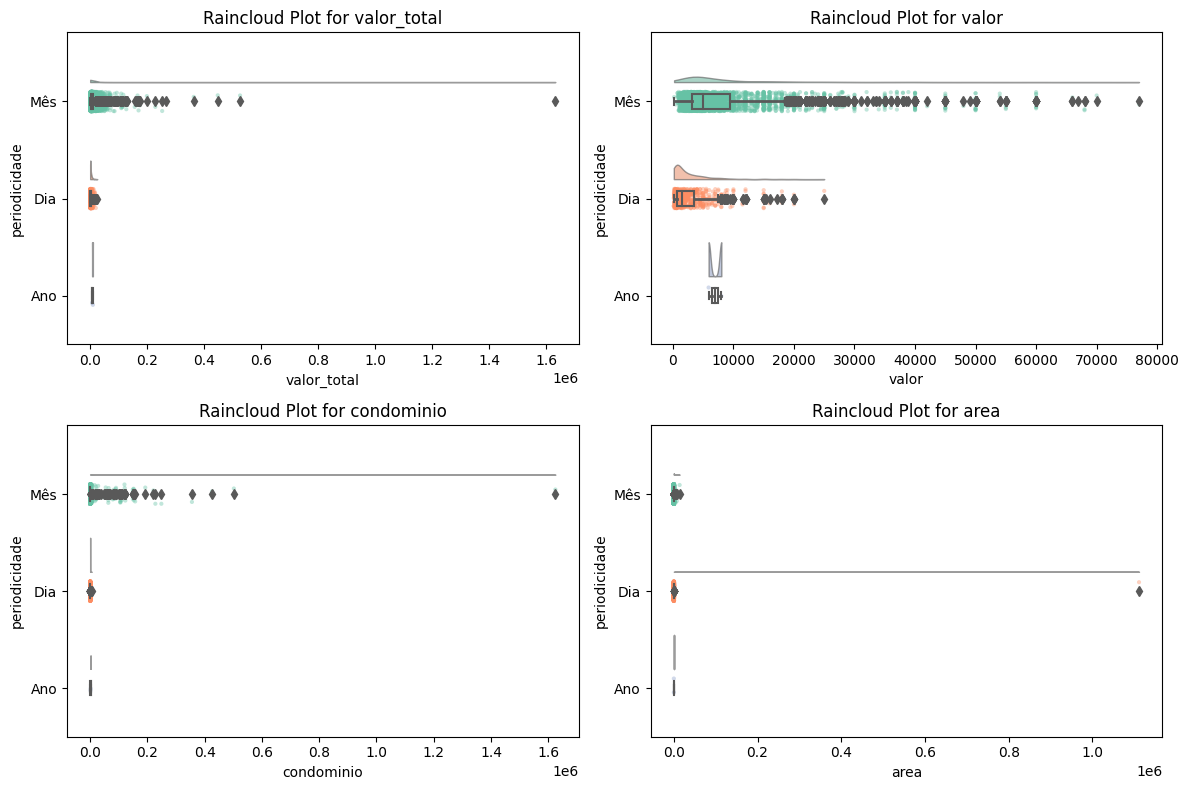

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through the axes and plot the raincloud plots
for i, col in enumerate(df_rainclouds.columns[:4]):
    pt.RainCloud(x='periodicidade', y=col, data=df_rainclouds, ax=axes[i // 2, i % 2], palette='Set2', orient='h', alpha=0.6, edgecolor='black', rain_alpha=0.4)
    axes[i // 2, i % 2].set_title(f'Raincloud Plot for {col}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Identificação de Outliers:

Podemos ver que existem outliers tanto para condodminio, quanto area, valor total e valor, vejamos abaixo:

In [16]:
df.sort_values(by='area').tail(5)[['id','area','condominio','valor','qtd_quartos']]

,id,area,condominio,valor,qtd_quartos
1444,2656679670,4500.0,0.0,4800,2.0
6131,2643219911,5000.0,0.0,28000,4.0
2131,2663657262,7300.0,10.0,18000,5.0
3301,2645559707,13982.0,0.0,12500,3.0
2720,2599659464,1111111.0,0.0,900,5.0


In [17]:
df.sort_values(by='valor').tail(3)[['id','area','condominio','valor','qtd_quartos']]

,id,area,condominio,valor,qtd_quartos
3493,2490708676,1000.0,0.0,68000,6.0
561,2640060121,1100.0,0.0,70000,7.0
3931,2658193377,1100.0,5000.0,77000,6.0


In [18]:
df.sort_values(by='condominio').tail(5)[['id','area','condominio','valor','qtd_quartos']]

,id,area,condominio,valor,qtd_quartos
4254,2666601303,330.0,248712.0,19000,3.0
6712,2666600704,282.0,355492.0,8000,4.0
725,2666601306,316.0,425664.0,22000,4.0
798,2666600566,316.0,501963.0,24000,4.0
4261,2662870690,98.0,1625000.0,7000,2.0


### Conclusão:
As colunas àrea e condomínio apresentam outliers, possívelmente causados por erros de digitação no portal. A coluna valor está condizente com o porte dos edificios. 

## Corrigindo Outliers:

Para que os Outliers não afetem o resultado da nossa análise vamos eliminálos da nossa amostra.
vamos utilizar esta abordagem pois não temos como inferir uma técnica única de correção para erros de digitação e a quantidade de amostra disponível ainda será satisfatória desta forma.

### Outliers de condomínio:

In [19]:
q1 = df['condominio'].quantile(0.25) #25% dos resultados são iguais ou menores a este valor
q3 = df['condominio'].quantile(0.75) #25% dos resultados sào iguais ou maiores a este valor
aiq = q3 - q1 # Este é o tamanho da faixa que contém 50% dos resultados
csuperior = q3 + (1.5 * aiq) #Este é o limite teórico máximo para que um valor seja congruente com a amostra.

print(f"Primeiro Quartil:{q1}\nTerceiro Quartil: {q3}\nAmplitude Interquartílica: {aiq}\nCerca Superior: {csuperior}")

Primeiro Quartil:0.0
Terceiro Quartil: 834.25
Amplitude Interquartílica: 834.25
Cerca Superior: 2085.625


### Outliers de Área

In [20]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
aiq = q3 - q1
csuperior = q3 + (1.5 * aiq)

print(f"Primeiro Quartil:{q1}\nTerceiro Quartil: {q3}\nAmplitude Interquartílica: {aiq}\nCerca Superior: {csuperior}")

Primeiro Quartil:68.0
Terceiro Quartil: 220.0
Amplitude Interquartílica: 152.0
Cerca Superior: 448.0


### Observação:

Nos outliers de condomínio e área o valor da cerca superior ficou abaixo de valores notadamente reais, por este motivo ao invés de utilizar o valor da cerca superior (2000) vamos precisar de outra abordagem:

## Executando a visualização dos raincloud plots novamente:

## Calculando o valor por metro quadrado / dia:

In [21]:
df['valor_m2'] = (df['valor'] / df['area']) / 30 if df['periodicidade'].str == 'Mês' else df['valor'] / df['area']
df.sort_values(by='valor_m2').tail(5)[['id','area','condominio','valor','qtd_quartos','valor_m2', 'periodicidade']]

,id,area,condominio,valor,qtd_quartos,valor_m2,periodicidade
4356,2662962366,78.0,342.0,22000,NaN,282.1,Mês
6908,2514517605,10.0,0.0,3500,4.0,350.0,Dia
4036,2653386765,12.0,900.0,4700,3.0,391.7,Mês
6771,2514441679,10.0,0.0,3990,6.0,399.0,Dia
7105,2551535377,10.0,0.0,14000,4.0,1400.0,Mês


In [22]:
df['valor_condo_m2'] = (df['condominio'] / df['area']) / 30 if df['periodicidade'].str == 'Mês' else df['condominio'] / df['area']
df.sort_values(by='valor_condo_m2').tail(5)[['id','area','condominio','valor','qtd_quartos','valor_condo_m2', 'periodicidade']]

,id,area,condominio,valor,qtd_quartos,valor_condo_m2,periodicidade
3116,2666600110,86.0,122779.0,4100,3.0,1427.7,Mês
798,2666600566,316.0,501963.0,24000,4.0,1588.5,Mês
267,2666600742,68.0,120716.0,9728,2.0,1775.2,Mês
724,2666598448,68.0,120716.0,8977,2.0,1775.2,Mês
4261,2662870690,98.0,1625000.0,7000,2.0,16581.6,Mês


Valores máximos e mínimos percebidos:

Area Máxima: 2000m2.

Valor mínimo por m2: 1

Valor máximo por m2: 500

Valor máximo de condomínio por m2/dia: 50

In [23]:
df_adjusted = df[(df['valor_m2'] < 500) &
        (df['valor_m2'] >= 1) &
        (df['area'] <= 2000) &
        (df['valor_condo_m2'] <= 40) &
        ((df['periodicidade'] == 'Dia')|(df['periodicidade'] == 'Mês'))]

## Análise de Rainplot por periodicidade

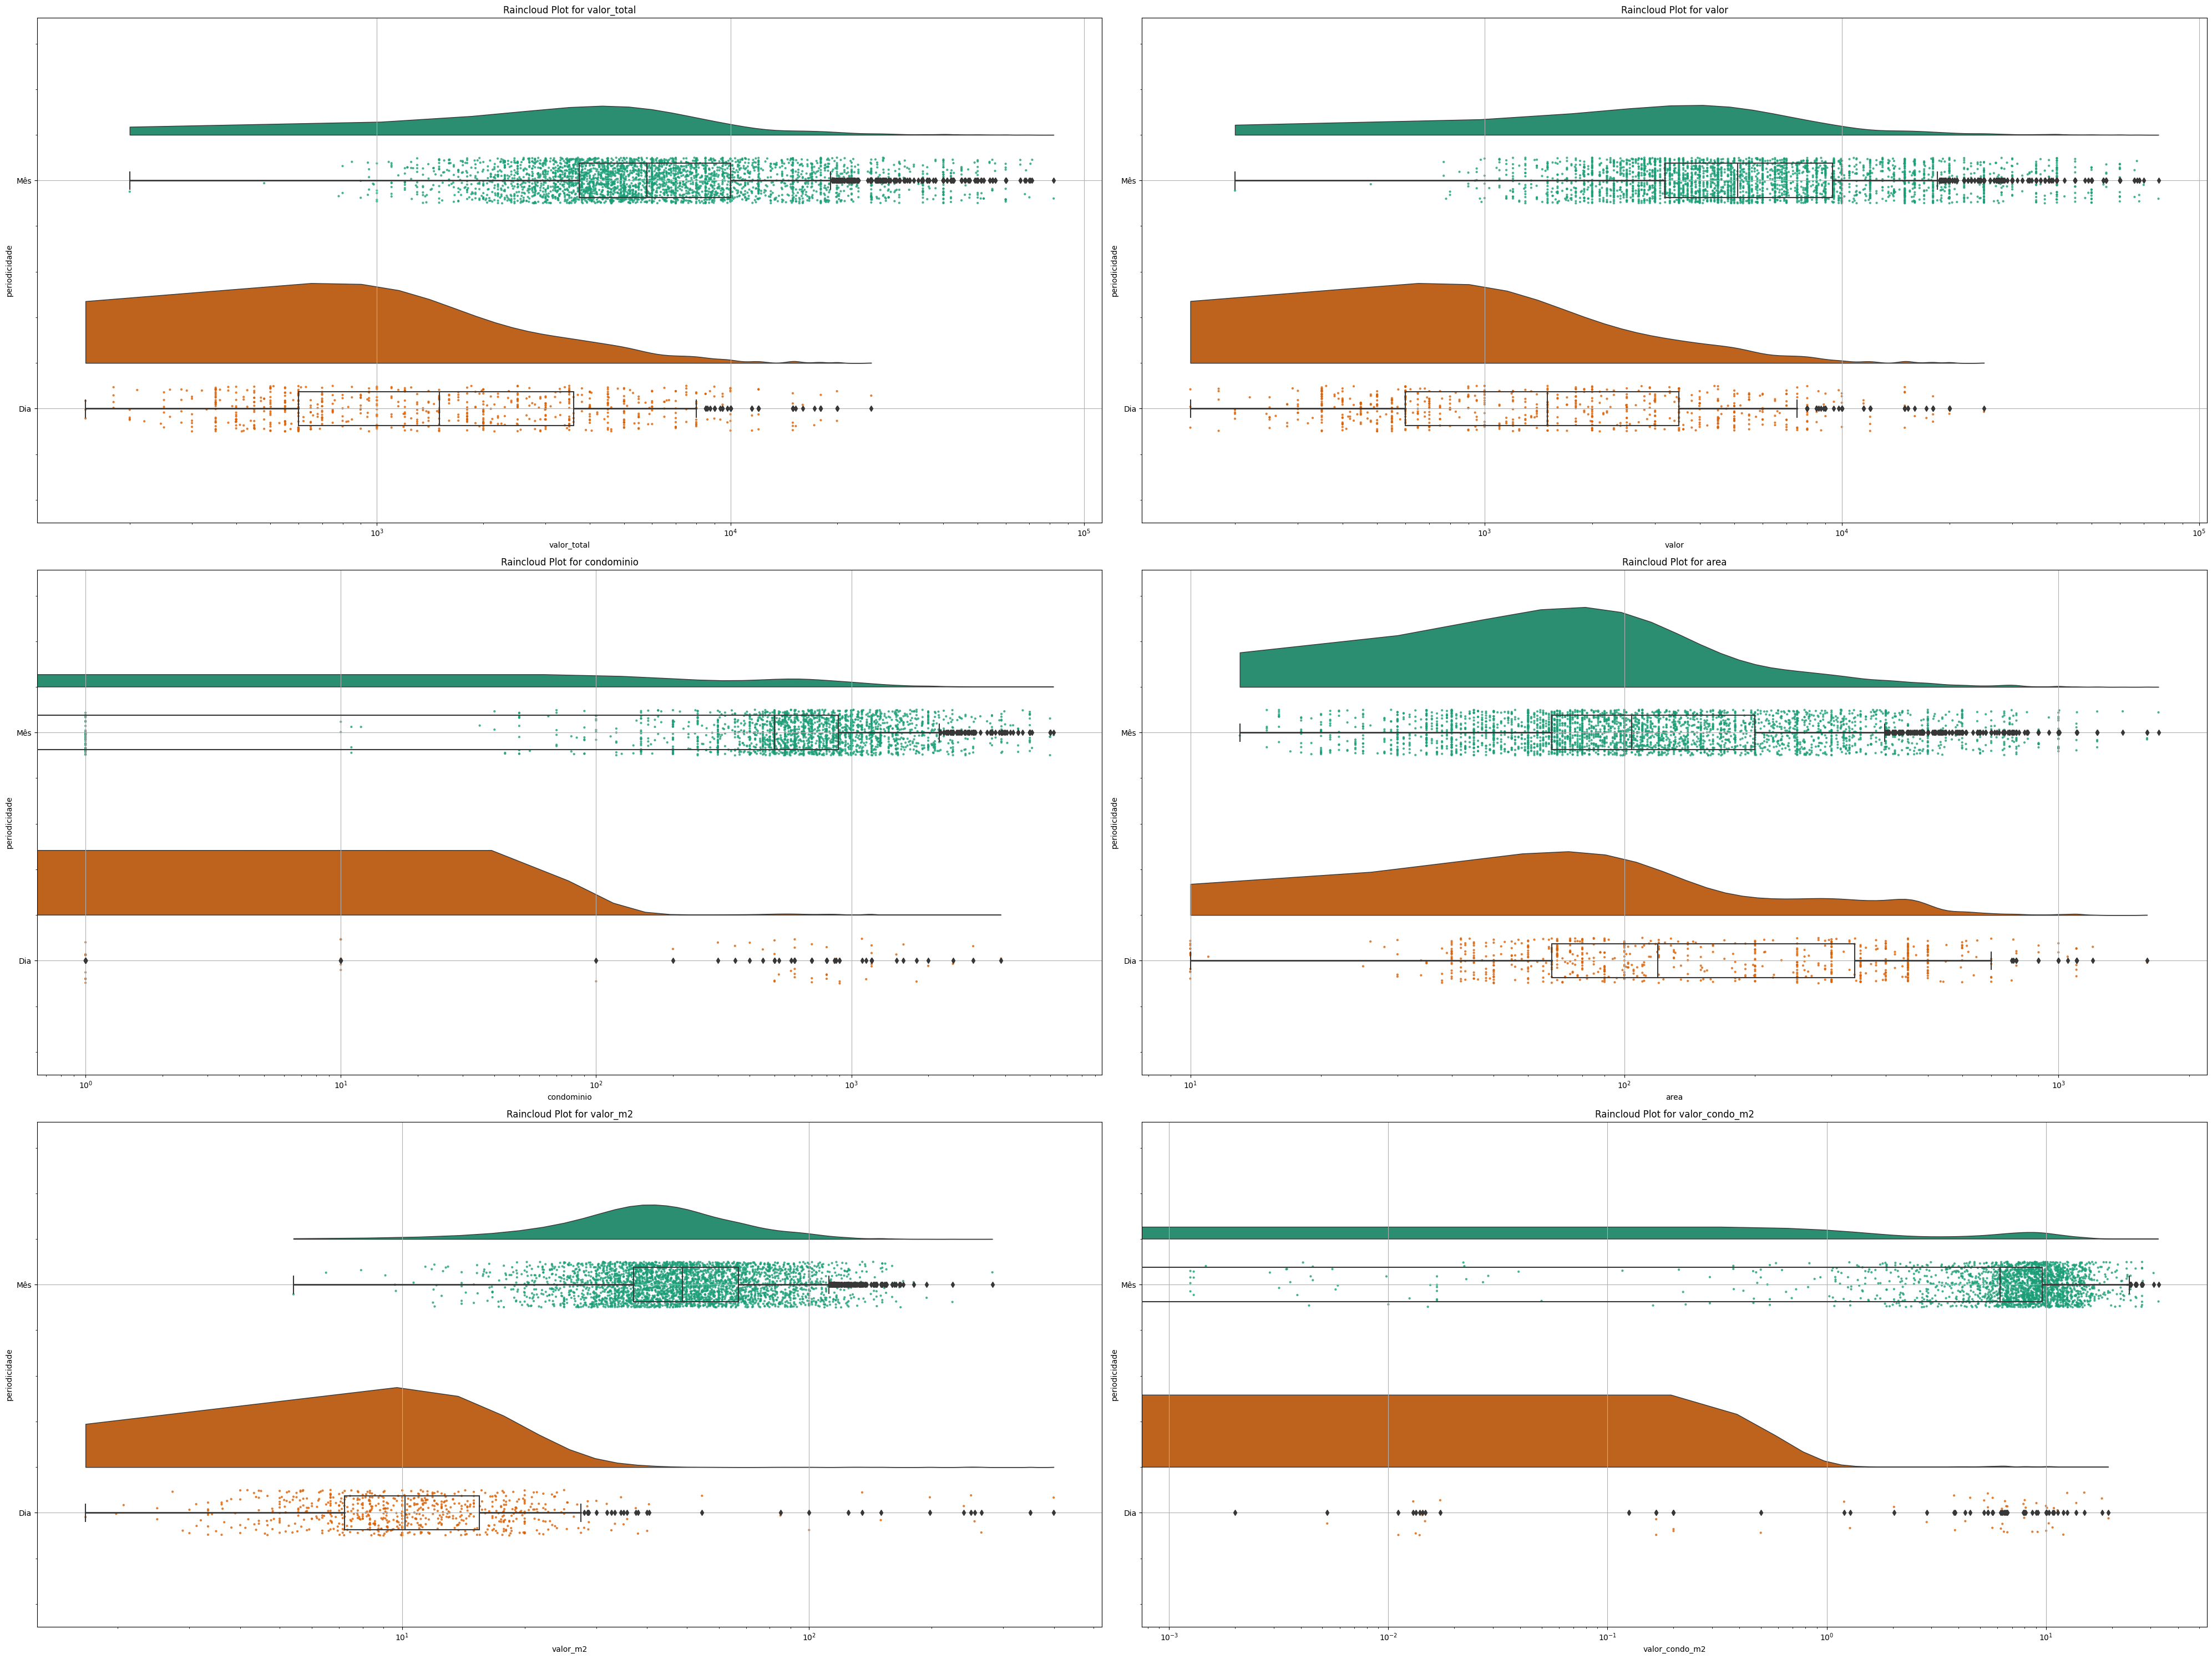

In [24]:
import matplotlib as mpl
import matplotlib.ticker as ticker

df_rainclouds = df_adjusted[['valor_total','valor','condominio','area','valor_m2', 'valor_condo_m2','periodicidade']]

fig, axes = plt.subplots(3,2, figsize=(40, 30))
for i, col in enumerate(df_rainclouds.columns[:6]):

    # Loop through the axes and plot the raincloud plots
    pt.RainCloud(x='periodicidade',
                 y=col,
                 data=df_rainclouds,
                 ax=axes[i // 2, i % 2],
                 palette='Dark2',
                 orient='h',
                 alpha=1,
                 edgecolor='FFFFFF',
                 width_viol = 0.7,
                 rain_alpha=.8)
                 #move = .25)
    axes[i // 2, i % 2].set_title(f'Raincloud Plot for {col}')
    axes[i // 2, i % 2].minorticks_on()
    axes[i // 2, i % 2].semilogx()
    axes[i // 2, i % 2].grid()


# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

# Calculando correlação de variáveis quantitativas

In [25]:
# Estimando correlação de variaveis quantitativas
df_corr = df[[
            'valor',
            'condominio',
            'area',
            'qtd_banheiros',
            'qtd_quartos',
            'qtd_vagas',
            'valor_total'
            ]]
corr_matrix = df_corr.corr()
pd.set_option('display.precision', 4) # Definindo a precisão em dígitos com a qual os números float64 serão exibidos.
pd.set_option('display.float_format', lambda x: '%.3f' % x)
corr_matrix


,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_total
valor,1.000,0.028,-0.003,0.616,0.539,0.537,0.299
condominio,0.028,1.000,-0.001,0.032,-0.005,-0.001,0.962
area,-0.003,-0.001,1.000,0.002,0.035,0.394,-0.002
qtd_banheiros,0.616,0.032,0.002,1.000,0.759,0.594,0.198
qtd_quartos,0.539,-0.005,0.035,0.759,1.000,0.619,0.141
qtd_vagas,0.537,-0.001,0.394,0.594,0.619,1.000,0.137
valor_total,0.299,0.962,-0.002,0.198,0.141,0.137,1.000


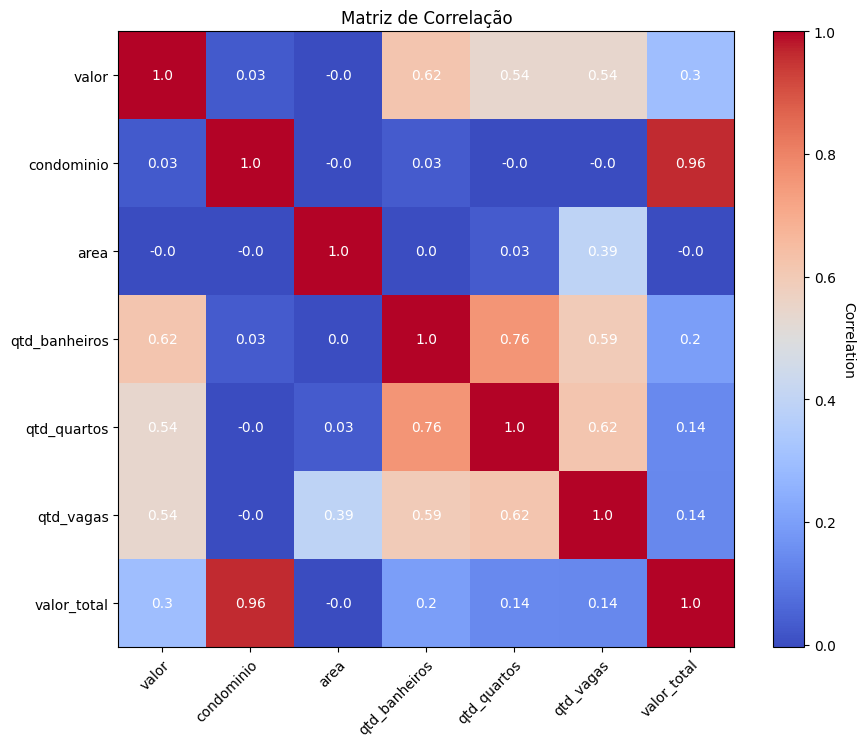

In [26]:
# Criando os subplots
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm')

# adicionando os valores de correlação aos subplots
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w")

# Setando os ticks e labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# rotacionando labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adicionando título
ax.set_title("Matriz de Correlação")

# Adicionando a legenda de cores
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")\

plt.show()

# Calculando Distribuição das variáveis qualitativas

In [27]:
# Listando todas as variáveis
columns = df.columns
columns

Index(['data', 'fonte', 'id', 'descricao', 'endereco', 'rua', 'numero',
       'bairro', 'cidade', 'valor', 'periodicidade', 'condominio', 'area',
       'qtd_banheiros', 'qtd_quartos', 'qtd_vagas', 'url', 'amenities',
       'valor_total', 'valor_m2', 'valor_condo_m2'],
      dtype='object')

In [28]:
# Preparando os dados:
df_bairro = pd.DataFrame(df['bairro'].value_counts()).reset_index().head(8)
df_periodicidade = pd.DataFrame(df['periodicidade'].value_counts()).reset_index()

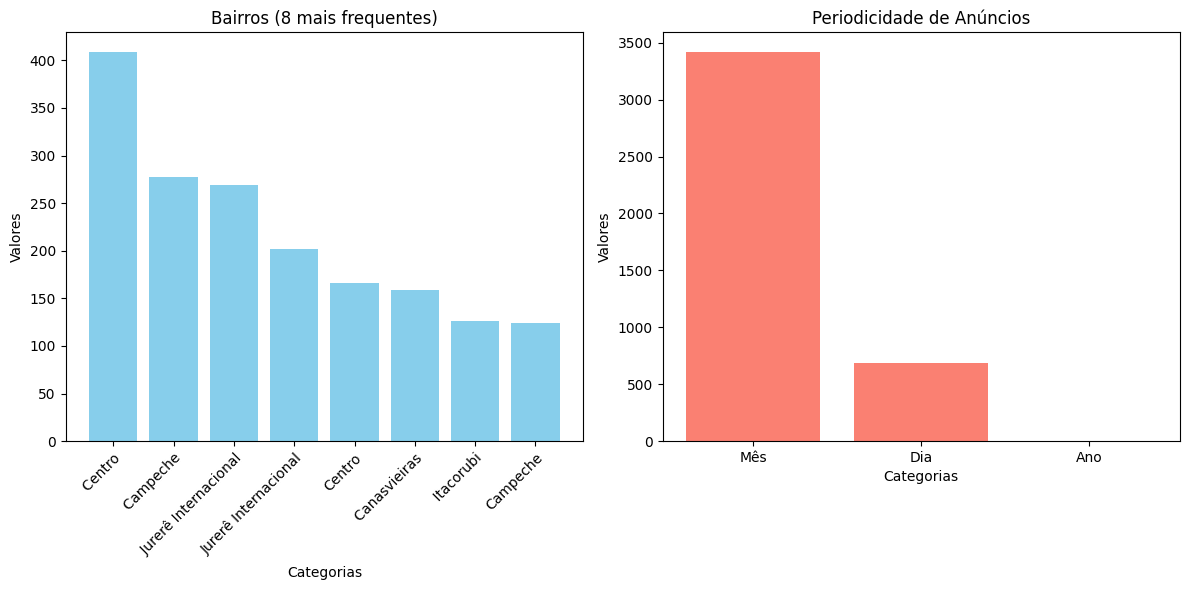

In [29]:
# Criar a figura e os eixos dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o primeiro gráfico de barras
ax1.bar(df_bairro['bairro'], df_bairro['count'], color='skyblue')
ax1.set_title('Bairros (8 mais frequentes)')
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Valores')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Plotar o segundo gráfico de barras
ax2.bar(df_periodicidade['periodicidade'], df_periodicidade['count'], color='salmon')
ax2.set_title('Periodicidade de Anúncios')
ax2.set_xlabel('Categorias')
ax2.set_ylabel('Valores')

# Ajustar o layout
plt.tight_layout()

# Mostrar o plot
plt.show()

# Correlação de Variáveis:

### Area vs. Valor:

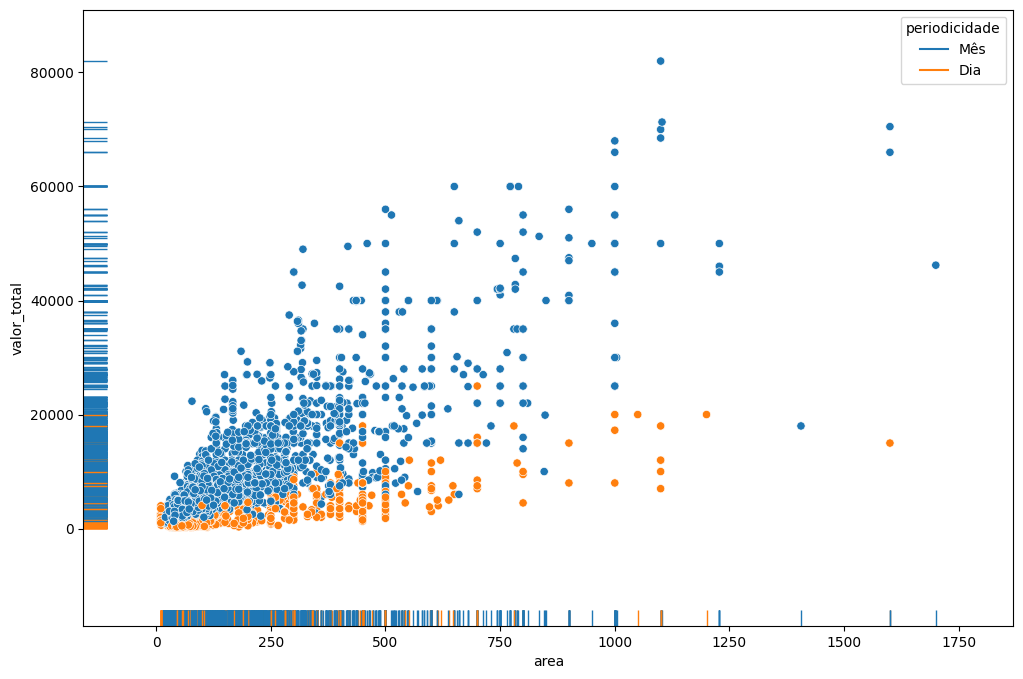

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df_adjusted, x="area", y="valor_total", hue='periodicidade')
sns.rugplot(data=df_adjusted, x="area", y="valor_total", hue='periodicidade')
plt.show()

# Visualização geográfica dos valores (em construção:

## Preparação do mapa por bairros

In [31]:
# Importando o módulo Geopandas
import geopandas as gpd

In [32]:
# Carregando o arquivo shp
forma = "/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos/gvw_distritos_administrativos.shp" 
map_df = gpd.read_file(forma)

# Checando as primeiras linhas do Dataframe
map_df

,id,nome,codigo_ibg,geometry
0,14,SACO DOS LIMÕES,NaN,"POLYGON ((744781.046 6942893.295, 744786.120 6..."
1,15,TAPERA DA BASE,NaN,"POLYGON ((744824.192 6938017.624, 744824.816 6..."
2,16,CAMPECHE,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6..."
3,17,LAGOA DA CONCEIÇÃO,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6..."
4,18,COQUEIROS,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6..."
5,19,BARRA DA LAGOA,NaN,"POLYGON ((752757.264 6943113.054, 752760.569 6..."
6,20,RIBEIRÃO DA ILHA,NaN,"POLYGON ((741474.143 6920249.649, 741480.396 6..."
7,21,SACO GRANDE,NaN,"POLYGON ((746210.517 6953416.500, 746235.956 6..."
8,22,SEDE,NaN,"POLYGON ((742410.177 6943145.230, 742408.774 6..."
9,23,CANASVIEIRAS,NaN,"POLYGON ((745243.145 6959489.353, 745265.512 6..."


<Axes: >

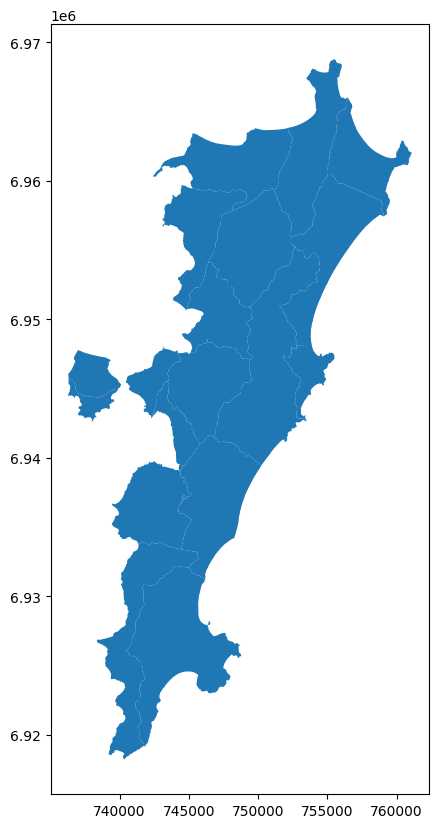

In [33]:
# Visualizando o mapa com o Matplotlib
fig,ax = plt.subplots(figsize=(10,10))
map_df.plot(ax=ax)

In [34]:
# Formatando a coluna de nome dos bairros
map_df['nome'] = map_df['nome'].str.title()
map_df.head(50)

,id,nome,codigo_ibg,geometry
0,14,Saco Dos Limões,NaN,"POLYGON ((744781.046 6942893.295, 744786.120 6..."
1,15,Tapera Da Base,NaN,"POLYGON ((744824.192 6938017.624, 744824.816 6..."
2,16,Campeche,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6..."
3,17,Lagoa Da Conceição,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6..."
4,18,Coqueiros,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6..."
5,19,Barra Da Lagoa,NaN,"POLYGON ((752757.264 6943113.054, 752760.569 6..."
6,20,Ribeirão Da Ilha,NaN,"POLYGON ((741474.143 6920249.649, 741480.396 6..."
7,21,Saco Grande,NaN,"POLYGON ((746210.517 6953416.500, 746235.956 6..."
8,22,Sede,NaN,"POLYGON ((742410.177 6943145.230, 742408.774 6..."
9,23,Canasvieiras,NaN,"POLYGON ((745243.145 6959489.353, 745265.512 6..."


## Preparando os dados do dataset a serem medidos

In [35]:
# Conciliando nomes de colunas com o dataset de mapas
df_mean = df_adjusted[df_adjusted['periodicidade']=='Mês'].copy()
df_mean['bairro'] = df_mean['bairro'].str.strip().str.title()
df_mean['bairro'] = df_mean['bairro'].str.replace('Ingleses Do Rio Vermelho','Ingleses')
df_mean['bairro'] = df_mean['bairro'].str.replace('Ingleses Norte','Ingleses')
df_mean['bairro'] = df_mean['bairro'].str.replace('São João Do Rio Vermelho','Rio Vermelho')
df_mean['bairro'] = df_mean['bairro'].str.replace('Centro','Sede')
df_mean['bairro'] = df_mean['bairro'].str.replace('Canajure','Canasvieiras')
df_mean['bairro'] = df_mean['bairro'].str.replace('Canto Da Lagoa','Lagoa Da Conceição')
df_mean.head()

,data,fonte,id,descricao,endereco,rua,numero,bairro,cidade,valor,...,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,amenities,valor_total,valor_m2,valor_condo_m2
0,2023-11-07 15:33:39,Vivareal,2660294130,"Apartamento com 3 Quartos para Aluguel, 88m²","Rua Desembargador Gil Costa, 310 - Capoeiras, ...",Rua Desembargador Gil Costa,310.000,Capoeiras,florianopolis,1900,...,529.000,88.000,2.000,3.000,1.000,https://vivareal.com.br/imovel/apartamento-3-q...,Área de serviço,2429.000,21.591,6.011
3,2023-11-07 15:33:39,Vivareal,2644853558,"Apartamento com 2 Quartos para Aluguel, 72m²","Avenida Buriti, 620 - Itacorubi, Florianópolis...",Avenida Buriti,620.000,Itacorubi,florianopolis,3800,...,533.000,72.000,2.000,2.000,1.000,https://vivareal.com.br/imovel/apartamento-2-q...,Churrasqueira; Elevador; Varanda; Academia; Es...,4333.000,52.778,7.403
5,2023-11-07 15:33:39,Vivareal,2664804925,"Cobertura com 2 Quartos para Aluguel, 115m²","Rua Paul Percival Harris - Estreito, Florianóp...",Rua Paul Percival Harris,NaN,Estreito,florianopolis,3500,...,680.000,115.000,2.000,2.000,2.000,https://vivareal.com.br/imovel/cobertura-2-qua...,Churrasqueira; Aceita animais; Garagem; Ar-con...,4180.000,30.435,5.913
7,2023-11-07 15:33:39,Vivareal,2658658081,"Apartamento com 4 Quartos para Aluguel, 143m²","Avenida Santa Catarina, 1556 - Balneário, Flor...",Avenida Santa Catarina,1556.000,Balneário,florianopolis,4900,...,990.000,143.000,2.000,4.000,2.000,https://vivareal.com.br/imovel/apartamento-4-q...,Piscina; Mobiliado; Churrasqueira; Elevador; A...,5890.000,34.266,6.923
10,2023-11-07 15:33:39,Vivareal,2665099607,"Apartamento com 3 Quartos para Aluguel, 72m²","Rua Doutor Abel Capela, 436 - Coqueiros, Flori...",Rua Doutor Abel Capela,436.000,Coqueiros,florianopolis,2700,...,438.000,72.000,1.000,3.000,1.000,https://vivareal.com.br/imovel/apartamento-3-q...,Interfone; Área de serviço,3138.000,37.500,6.083


In [36]:
# Sumarizando valores por bairro
df_mean = df_mean.groupby('bairro')['valor_total'].median()
df_mean = pd.DataFrame(df_mean).reset_index()
df_mean = df_mean.sort_values(by='bairro')
df_mean

,bairro,valor_total
0,Abraão,5014.000
1,Agronômica,7340.000
2,Armação,7075.000
3,Armação Do Pântano Do Sul,2630.000
4,Açores,2950.000
...,...,...
56,Tapera Da Base,2625.000
57,Trindade,3712.000
58,Vargem Do Bom Jesus,2596.000
59,Vargem Grande,2970.000


## Relacionando DF de mapas com DF de valores sumarizados

In [37]:
merged_gdf = map_df.merge(df_mean, left_on='nome', right_on='bairro', how='left')
merged_gdf = merged_gdf.sort_values(by='nome')
merged_gdf['valor_total'] = merged_gdf['valor_total'].fillna(0)
merged_gdf

,id,nome,codigo_ibg,geometry,bairro,valor_total
5,19,Barra Da Lagoa,NaN,"POLYGON ((752757.264 6943113.054, 752760.569 6...",Barra Da Lagoa,5400.000
15,29,Cachoeira Do Bom Jesus,NaN,"POLYGON ((751151.067 6959322.001, 751151.143 6...",Cachoeira Do Bom Jesus,7232.000
2,16,Campeche,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6...",Campeche,7000.000
9,23,Canasvieiras,NaN,"POLYGON ((745243.145 6959489.353, 745265.512 6...",Canasvieiras,3500.000
4,18,Coqueiros,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6...",Coqueiros,4677.500
16,30,Estreito,NaN,"POLYGON ((737856.426 6944431.099, 737849.727 6...",Estreito,4360.000
11,25,Ingleses,NaN,"POLYGON ((755042.558 6960493.181, 755043.887 6...",Ingleses,3800.000
3,17,Lagoa Da Conceição,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6...",Lagoa Da Conceição,8800.000
14,28,Pântano Do Sul,NaN,"POLYGON ((741825.954 6924129.445, 741838.840 6...",Pântano Do Sul,2500.000
10,24,Ratones,NaN,"POLYGON ((746945.937 6953709.978, 746934.416 6...",Ratones,7000.000


## Gerando visualização

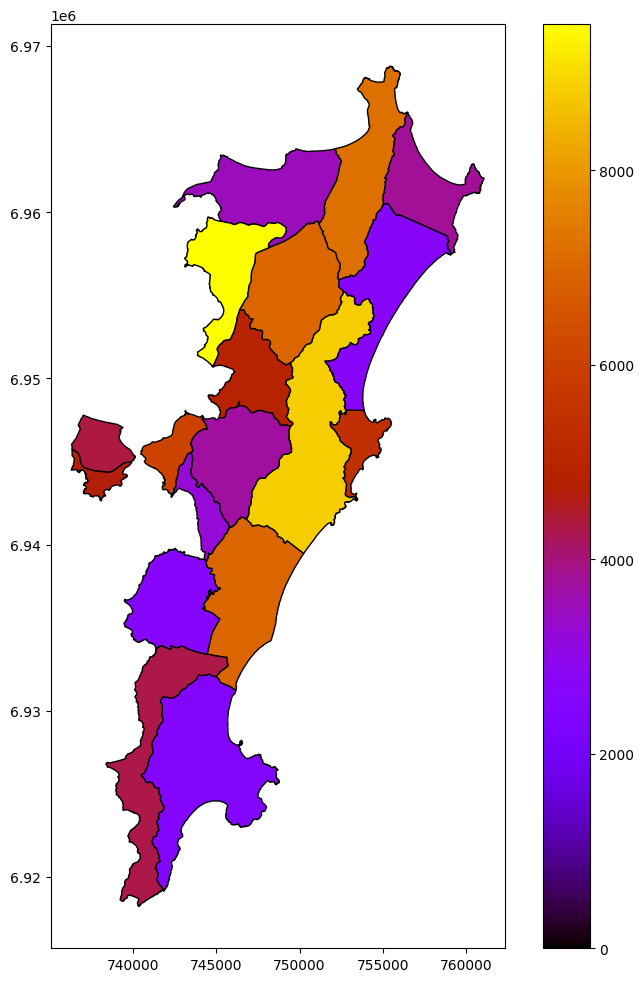

In [38]:
fig,ax = plt.subplots(figsize=(10,12))
merged_gdf.plot(
    ax=ax,
    column='valor_total',
    cmap='gnuplot',
    legend=True,
    vmin=0,
    markersize=100,
    edgecolor='k')
plt.show()